# **Inteligencia Artificial y Aprendizaje Automático**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr Luis Eduardo Falcón Morales**
### **Tecnológico de Monterrey**
## **Actividad Individual Semana 9: Pronósticos con Series de Tiempo**


#### **Nombre: Alexys Martín Coate Reyes**
#### **Matrícula: A01746998**

In [182]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Carga y preparación de los datos**

In [183]:
# Cargar los dato y ver su estructura
data = pd.read_csv("/content/monthly_champagne_sales.csv")
data.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [185]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


### Visulizando la serie de tiempos

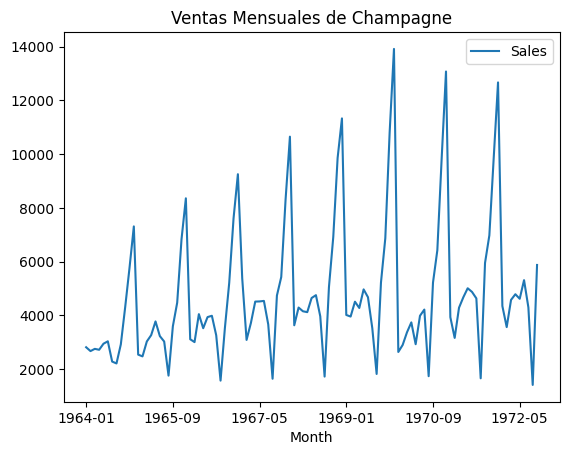

In [186]:
# Graficando con pandas la serie de tiempo
data.plot(x='Month', y='Sales', kind='line')
plt.title('Ventas Mensuales de Champagne')
plt.show()

*   Tenemos un dataframe con todas las entradas completas y se describe por una serie de tiempos
* Se observa que existe una tendencia de crecimiento a lo largo del tiempo
* Existen meses a lo largo del los años, que tienen mayores volúmenes de venta siguiendo un patrón o tendencia.




### Realizando preparación de datos para serie de tiempo

In [187]:
# Renombremos de manera estándar las columnas de fechas y valores de la
# serie de tiempo, donde además la fecha la trasnformamos a tipo datetime:

data.columns = ['ds', 'y']    # renombra la columna (mes: ds) y (sales: y) para su posterior análisis en con las librerias
data['ds']= pd.to_datetime(data['ds'])  # Colocar en formato de fecha la columna de mes

data.head()

,ds,y
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


In [188]:
# Coloca el campo de las fechas como el índice para el análisis de serie de tiempos
data_temp = data.copy()
data_temp.set_index('ds', inplace=True)   #
data_temp.head()

,y
ds,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [189]:
# Verificar la frecuencia de los índices
data_temp.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='ds', length=105, freq=None)

Para las opciones de "freq" ver la tabla que viene en esta liga:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

In [190]:
data_temp.index.freq = 'MS'  # MS-Month-start-frequency

### Realizando particiónes de datos de entrenamiento

In [191]:
# Revisando tamaño de los datos
data_temp.shape

(105, 1)

In [192]:
import math

# Realizando una partición de datos del
train_size = 0.9
train = data_temp.iloc[:math.trunc(data_temp.size * train_size)]
test = data_temp.iloc[math.trunc(data_temp.size * (train_size)):]

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Total shape:", train.shape[0] + test.shape[0])

Train shape: (94, 1)
Test shape: (11, 1)
Total shape: 105


## **Modelo Ingenuo**

In [193]:
test.values.T

array([[ 9851, 12670,  4348,  3564,  4577,  4788,  4618,  5312,  4298,
         1413,  5877]])

In [194]:
from sklearn.metrics import mean_squared_error

# Para utilizar la función el dataframe debe tener un shape de la forma (N, 1) y con la columna N con formato de tiempo y valores indexados

def ingenuo_model(train, test):

  history = [x for x in train.values.T[0]]   # Definimos "history" donde de manera incremental se irán agregando registros mensuales.
  predictions = list()    # Lista que contendrá las predicciones del modelo ingenuo.

  for i in range(len(test.values.T[0])):
    # Obtenemos las predicciones:
    yhat = history[-1]   # La primera vez, tomamos el último dato del Train, en las siguientes, se van agregando los datos de Test.
    predictions.append(yhat)

    # Observaciones-registros reales:
    obs = test.iloc[i][0]   # Ahora vamos tomando los datos de Test.
    history.append(obs)  # Vamos agregando a "history" (que ya tiene todo los de Train) en cada iteración, un dato más de los de Test.
    print('>Esperado-real = %3d, Predicción = %.3f' % (obs, yhat))


  # Calculamos la raíz del error cuadrático medio (RMSE):
  rmse = np.sqrt(mean_squared_error(test['y'].values, predictions))
  print('\nError-Modelo-Naive: RMSE: %.3f' % rmse, "\n")

  # Grafiquemos los resultados:
  fig, ax = plt.subplots(figsize=(10, 4))
  ax = plt.plot(train, '-k')  # Datos de entrenamiento de 1949 a 1959 (los históricos).
  ax = plt.plot(test, '+b')    # Datos de prueba reales del año 1960 (los del útimo año a predecir).
  ax = plt.plot(test.index, predictions, 'xr')  # Predicciones del modelo ingenuo para el último año 1960.

  return rmse

>Esperado-real = 9851, Predicción = 6981.000
>Esperado-real = 12670, Predicción = 9851.000
>Esperado-real = 4348, Predicción = 12670.000
>Esperado-real = 3564, Predicción = 4348.000
>Esperado-real = 4577, Predicción = 3564.000
>Esperado-real = 4788, Predicción = 4577.000
>Esperado-real = 4618, Predicción = 4788.000
>Esperado-real = 5312, Predicción = 4618.000
>Esperado-real = 4298, Predicción = 5312.000
>Esperado-real = 1413, Predicción = 4298.000
>Esperado-real = 5877, Predicción = 1413.000

Error-Modelo-Naive: RMSE: 3260.144 



<ipython-input-194-eda55896cef3>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  obs = test.iloc[i][0]   # Ahora vamos tomando los datos de Test.


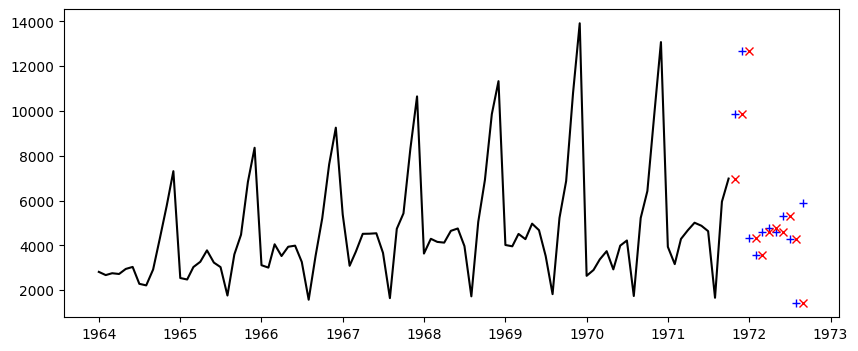

In [195]:
ingenuo_rmse = ingenuo_model(train, test)

## **Modelo ARIMA**


#### *Análisis del grafico de descomposición de la serie de tiempo*

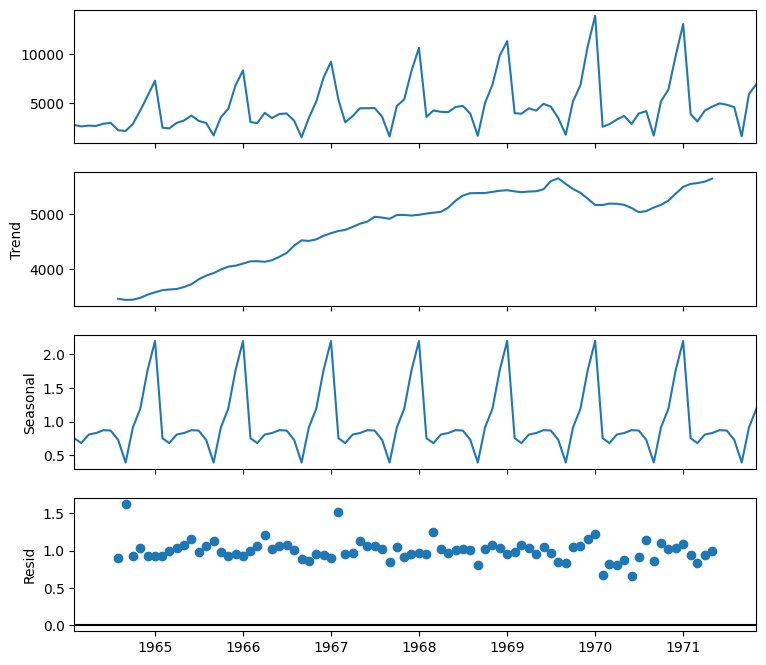

In [196]:
from statsmodels.tsa.seasonal import seasonal_decompose

def plot_seasonal_decompose(df, model='multiplicative', fig_size=(8,6)):

  # Obtención de valores de descomposición estacional:
  decomposition = seasonal_decompose(df.resample('ME').mean(), model=model)

  # Graficando valores de decomposición
  fig = decomposition.plot()
  fig.set_size_inches(fig_size)
  plt.show()

# Se eligió un modelo multiplicativo porque se observa que los picos tienen a crecer con el tiempo
plot_seasonal_decompose(train, model='multiplicative', fig_size=(8,7))

#### *Verificando graficas de estacionalidad*

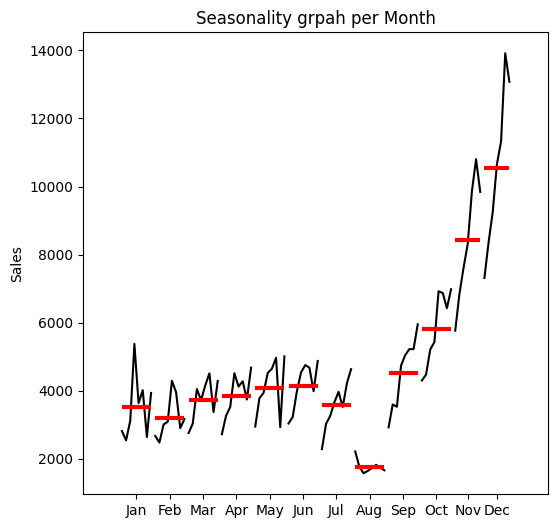

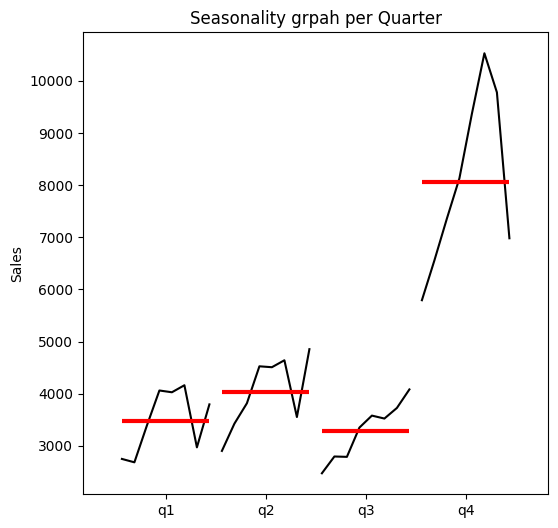

In [197]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

def seasonality_detection_plot(df, seasonality="Month", ylabel=None):

  # Grafica una grafica para la detección de estacionalidad
  if seasonality == "Month":
    fig = month_plot(df.resample('ME').mean(), ylabel=ylabel)
  elif seasonality == "Quarter":
    fig = quarter_plot(df.resample('QE').mean(), ylabel=ylabel)

  fig.set_size_inches(6,6)
  plt.title(f"Seasonality grpah per {seasonality}")
  plt.show()

seasonality_detection_plot(train, seasonality="Month", ylabel="Sales")
print("\n")
seasonality_detection_plot(train, seasonality="Quarter", ylabel="Sales")




*   Ambas gráficas muestran un crecimiento grande en el último cuarto del año



### *Gráficos de Autocorrelación (ACF) y Autocorrelación Parcial (PACF)*

In [198]:
test.head()

,y
ds,
1971-11-01,9851
1971-12-01,12670
1972-01-01,4348
1972-02-01,3564
1972-03-01,4577


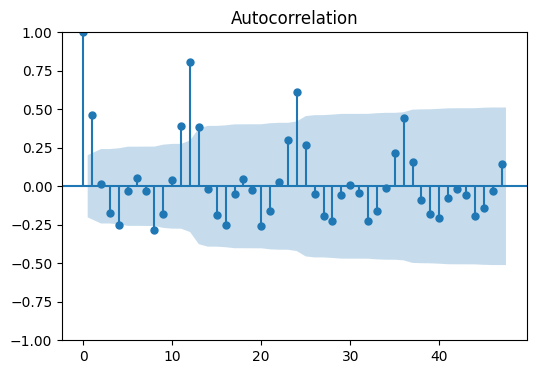

In [199]:
from statsmodels.graphics.tsaplots import plot_acf

# Gráfico de Autocorrelación (ACF: Auto-Correlation-Function)
def autocorrelation_plot(df, lags=None, figsize=(6,4)):

  if lags is None:
    lags = len(df)*0.6
    print("lags value:", math.trunc(lags))

  fig, ax = plt.subplots(figsize=figsize)
  plot_acf(df, lags=lags, ax=ax)
  plt.show()

  # Eliges el número de unidades (meses) desfasadas. El número de "lags" es el número
  # que define la partición en el eje horizontal. El área no sombreada nos habla de
  # la cantidad de períodos de tiempo hacia atrás cuya información proporcionada es
  # significativa para la predicción futura.
  # También nos ayuda a detectar periodicidades, como en este caso que se observa a 13 meses, aprox.

autocorrelation_plot(train, lags=47, figsize=(6,4))

# ARIMA (p,d,q)
q = 1
# Se seleccionó 1 poruqe es el primer valor antes de la región azul sin contar el primer punto



*   Elemento de la lista
*   Elemento de la lista



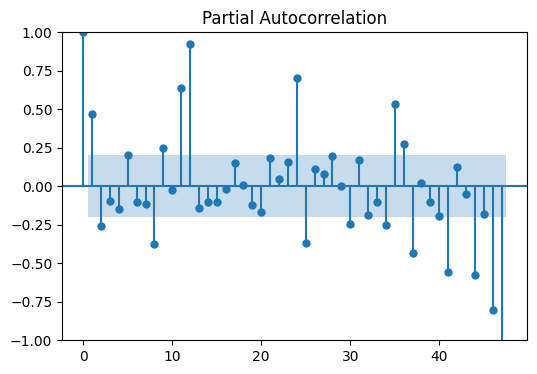

In [200]:
from statsmodels.graphics.tsaplots import plot_pacf

# Gráfico de Autocorrelación Parcial (PACF):
def partial_autocorrelation_plot(df, lags=None, method="ols", figsize=(6,4)):

  if lags is None:
    lags = len(df)*0.6
    print("lags value:", math.trunc(lags))

  fig,ax = plt.subplots(figsize=figsize)
  plot_pacf(df, lags=lags, ax=ax, method=method)
  plt.show()

partial_autocorrelation_plot(train, lags=47, method="ols", figsize=(6,4))

# ARIMA (p,d,q)
p = 1
# Se seleccionó 1 poruqe es el primer valor antes de la región azul sin contar el primer punto



*   Elemento de la lista
*   Elemento de la lista



In [201]:
from statsmodels.tsa.arima.model import ARIMA

def ARIMA_model(train, test,
                p, d, q, max_iter=300,
                metric="RMSE",
                printRes=True, plotRes=True, printPredictions=True):

  #################### Definiendo funciones ####################

  # Lo primero es para quitar la estacionalidad y transformar un problema
  # de tipo no-estacionario (SARIMA) en uno estacionario (ARIMA):

  # Diferencia de datos consecutivos en el tiempo
  # y podemos ahora usar ARIMA:
  def difference(dataset, interval=1):
    diff = list()

    for i in range(interval, len(dataset)):
      value = dataset[i] - dataset[i - interval]
      diff.append(value)

    return np.array(diff)

  # Invierte las diferencias anteriores, es decir, nos regresa la estacionalidad:
  def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]


  def plot_predictions(train, test, predictions):
    fig, ax = plt.subplots(figsize=(10, 4))
    ax = plt.plot(train, '-k')   # Grafico de los datos de entrenamiento (linea)
    ax = plt.plot(test, '-b')    # Grafico de los datos de prueba (linea)
    ax = plt.plot(test, '+c')    # Gráfico de los puntos de las ventas ()
    ax = plt.plot(test.index, predictions, 'xr')    # Grafico de las predicciones (Taches "x")

  #################################################################


  # Definamos la siguiente lista de registros de pasajeros en el tiempo:
  history = [x for x in train.loc[:,'y'].values]   # train-ndarray : columna solo con los registros de pasajeros "y".
                                # history-list : lista con los datos del train.

  predictions = list()   # Para incluir las predicciones que vaya generando el modelo.

  for i in range(len(test['y'])):

    #
    months_in_year = 12
    diff = difference(history, months_in_year)    # diff-list: lista de los datos de diferencias para transformar SARIMA en ARIMA.

    # Generamos el modelo.
    model = ARIMA(diff, order=(p,d,q),) # Si aplicamos diff, entonces d=0 es aplicable.
    model_fit = model.fit(method_kwargs={'maxiter':max_iter})  # Aumentar las iteraciones para evitar el WarningConvergence.

    yhat = model_fit.forecast()[0]   # prediccions (yhat) de cada registro, es un solo número flotante.
    yhat = inverse_difference(history, yhat, months_in_year)    # El "history" sigue siendo la lista de arriba.
                                                                # El nuevo "yhat" es cada un nuevo valor (float) de predicción.
    predictions.append(yhat)  # predictions-list : lista que se va incrementando al ir agregando cada predicción nueva.

    # Observaciones-reales:
    obs = test.iloc[i]['y']   #  cada dato es un flotante.
    history.append(obs)   #  history-list : se va incrementado a partir del Train con los registros-observaciones reales.

    if printPredictions == True:
      print('>Esperado-real = %3d, Predicción = %.3f' % (obs, yhat))

  if plotRes == True:
    # Imprime gráfica de comparación detos de prueba con predicciones
    plot_predictions(train, test, predictions)


  if metric == "RMSE":
    # Error RMSE:
    rmse = np.sqrt(mean_squared_error(test['y'].values, predictions))
    result = rmse

  if printRes == True:
    print('\nError-Modelo-ARIMA: RMSE: %.3f \n' % result)

  return result



>Esperado-real = 9851, Predicción = 10229.975
>Esperado-real = 12670, Predicción = 13356.788
>Esperado-real = 4348, Predicción = 4090.764
>Esperado-real = 3564, Predicción = 3445.262
>Esperado-real = 4577, Predicción = 4606.652
>Esperado-real = 4788, Predicción = 4986.036
>Esperado-real = 4618, Predicción = 5280.615
>Esperado-real = 5312, Predicción = 5028.173
>Esperado-real = 4298, Predicción = 4916.492
>Esperado-real = 1413, Predicción = 1827.770
>Esperado-real = 5877, Predicción = 6092.176

Error-Modelo-ARIMA: RMSE: 410.781 



410.78091701308995

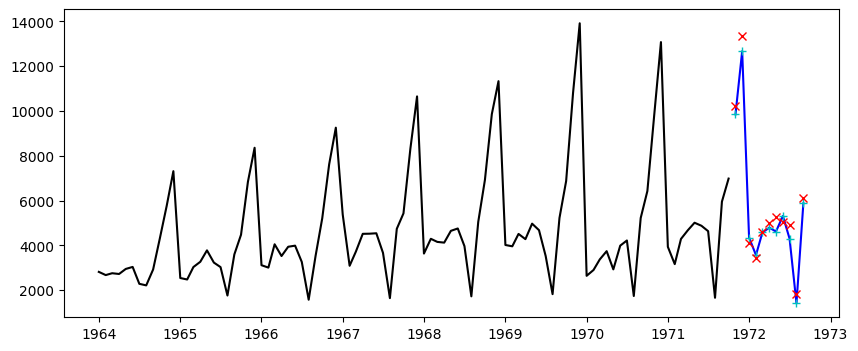

In [202]:
ARIMA_parameters = {
    "p": p,
    "d": 0,
    "q": q,
    "max_iter": 300,
}
ARIMA_model(train, test, **ARIMA_parameters,
            printRes=True, plotRes=True, printPredictions=True)

>Esperado-real = 9851, Predicción = 9959.760


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


>Esperado-real = 12670, Predicción = 13328.611
>Esperado-real = 4348, Predicción = 4304.574
>Esperado-real = 3564, Predicción = 3536.298
>Esperado-real = 4577, Predicción = 4412.593
>Esperado-real = 4788, Predicción = 4849.779
>Esperado-real = 4618, Predicción = 5383.115
>Esperado-real = 5312, Predicción = 5223.185
>Esperado-real = 4298, Predicción = 4898.756
>Esperado-real = 1413, Predicción = 1595.815
>Esperado-real = 5877, Predicción = 6011.180

Error-Modelo-ARIMA: RMSE: 367.389 



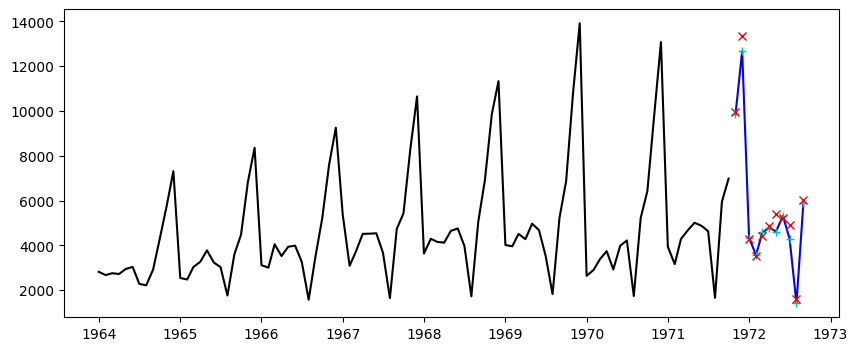

In [203]:
ARIMA_parameters = {
    "p": 2,
    "d": 0,
    "q": 4,
    "max_iter": 1000,
}
# Variando los probando distintos parametros se obtuvo que el mejor resultado fue el siguiente
ARIMA_rmse = ARIMA_model(train, test, **ARIMA_parameters,
                         printRes=True, plotRes=True, printPredictions=True)

## **Modelo Prophet**

**Prophet requiere que la entrada sean dos columnas, llamadas "ds" y "y"!**

In [204]:
# Quitando el indice y volviendo un dataframe de (N,2)
train_prophet = train.reset_index()
test_prophet = test.reset_index()
display(train.head(3))
display(test.head(3))
print("Train Size:", train_prophet.shape)
print("Test Size:", test_prophet.shape)
print("Total Size:", data.size)

,y
ds,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755


,y
ds,
1971-11-01,9851
1971-12-01,12670
1972-01-01,4348


Train Size: (94, 2)
Test Size: (11, 2)
Total Size: 210


In [205]:
from prophet import Prophet

############### Prophet requiere que la entrada sean dos columnas, llamadas "ds" y "y" ###############

def prophet_model(train, test, metric="RMSE", printRes=True, plotRes=True,
                  seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  changepoint_prior_scale=10.,
                  seasonality_prior_scale=18):

  # Aplicamos el modelo Facebbok-Prophet a nuestros datos:
  model = Prophet(seasonality_mode='multiplicative',
                  yearly_seasonality = yearly_seasonality,
                  weekly_seasonality = weekly_seasonality,
                  daily_seasonality = daily_seasonality,
                  changepoint_prior_scale = changepoint_prior_scale,   # Controla la flexibilidad de la componente Trend, mayor valor mayores fluctuaciones.
                  seasonality_prior_scale = seasonality_prior_scale)    # Controla la estacionalidad, mayor el valor, mayor flexibilidad en la estacionalidad.
  model.fit(train)

  if metric =="RMSE":
    # Calculamos el error RMSE:
    pred_FP = model.predict(test)['yhat']
    rmse = np.sqrt(mean_squared_error(test['y'], pred_FP))
    result = rmse


  if printRes == True:
    print('\nError-Modelo-Prophet: RMSE: %.3f \n' % result)


  # La librería misma nos permite obtener las predicciones con las cotas mínima
  # y máxima, además de su gráfica, como se muestra a continuación:
  forecast = model.predict(test)

  # Mostrar gráfica
  if plotRes == True:

    # Grafica
    fig, ax = plt.subplots(figsize=(10, 5))
    model.plot(forecast, ax=ax)               # Las predicciones se muestran con la línea continua, junto con su región de variabilidad de la predicción.
    ax = plt.plot(test['ds'], test['y'], '*r', label="Valores Reales")   # Agregamos los datos de prueba (Test) con puntos rojos, para observar la diferencia.
    ax = plt.plot(test['ds'], forecast['yhat'], '+c', label="Predicción")    # Valores reales.

    # Mostrar la leyenda
    plt.legend()
    plt.show()

  return result


DEBUG:cmdstanpy:input tempfile: /tmp/tmpjkszkf1i/0vvg9nxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjkszkf1i/u3opaohw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98982', 'data', 'file=/tmp/tmpjkszkf1i/0vvg9nxk.json', 'init=/tmp/tmpjkszkf1i/u3opaohw.json', 'output', 'file=/tmp/tmpjkszkf1i/prophet_modelj6w05y_e/prophet_model-20250311030024.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:00:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:00:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Error-Modelo-Prophet: RMSE: 418.879 



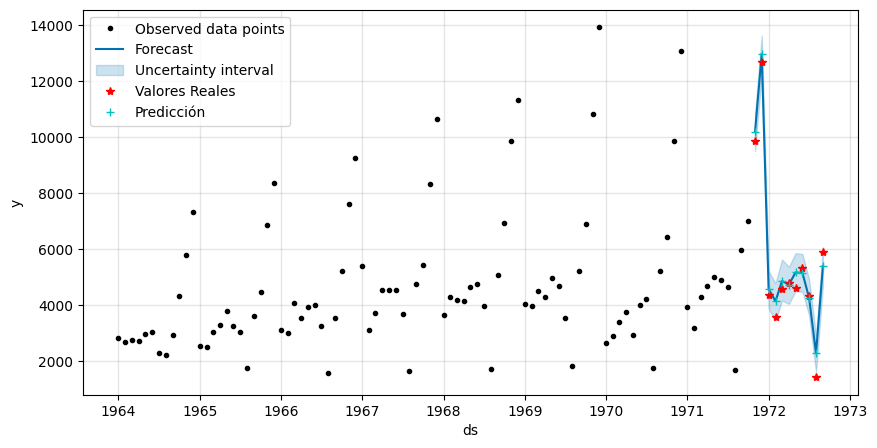

In [206]:
prophet_parameters = {
    "yearly_seasonality" : True,
    "weekly_seasonality" : False,
    "daily_seasonality" : False,
    "changepoint_prior_scale" : 0.1,
    "seasonality_prior_scale" : 0.5
}

prophet_rmse = prophet_model(train_prophet, test_prophet, metric="RMSE",
                             printRes=True, plotRes=True, **prophet_parameters)

## **Modelo LSTM**


In [207]:
data_temp

,y
ds,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [208]:
# Definimos una función para crear secuencias de tiempo
# con la ventada de tiempo que consideremos adecuada.

def creamos_secuencias(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])  # Ventana en este ejercicio de 12 meses de manera continua
        y.append(data[i])  # y el siguiente mes a predecir, dados los 12 anteriores.
    return np.array(X), np.array(y)

In [209]:
# Tamaño de la ventana en meses
window_size = 12

# Creamos las secuencias de entrenamiento
X, y = creamos_secuencias(data_temp[['y']].values, window_size)

print("X:", X.shape)  # verifiquemos que el formato es el requerido por la CNN.
print("y:", y.shape)

X: (93, 12, 1)
y: (93, 1)


In [210]:
# Dividimos los datos en Entrenamiento y Prueba:
split = int(0.85 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("X_train:", X_train.shape)   # (secuencias, tamaño_secuencia, variables)
print("X_test:", X_test.shape)    # Test no necesariamente tiene que ser de 12 secuencias, pero sí al menos incluir 12.

print("y_train:", y_train.shape)   # (secuencias, tamaño_secuencia, variables)
print("y_test:", y_test.shape)

X_train: (79, 12, 1)
X_test: (14, 12, 1)
y_train: (79, 1)
y_test: (14, 1)


In [211]:
import tensorflow as tf
import keras
from keras import Sequential
from keras import layers
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler


def LSTM_model(X_train, y_train, X_test, y_test,
               model=None, epochs = 65, batch_size = 32,
               optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()],
               metric="RMSE", printResult=True, printPlot=True):

  ############################## CONSTRUCCION DEL MODELO ##############################

  if modelo == None:
    print("Falta definir un modelo mediante una función y pasarlo como argumento a LSTM_model!!!")
    return

  # Compilamos el modelo
  model.compile(optimizer = optimizer,
                loss = loss,
                metrics = metrics)  #despliega RMSE

  # y llevamos a cabo el entrenamiento con los cunjuntos de entrenamiento y prueba:
  early_stopping = EarlyStopping(monitor='val_loss', patience=10) # 'patience' define cuántas épocas sin mejora se toleran
  history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), )


  ############################## REALIZANDO PREDICCIÓN ##############################

  # hacemos la predicción para los últimos 12 meses solamente, para poder
  # compararlo con los modelos que obtuvimos previamente, a saber, el ingenuo,
  # arima y prophet:
  pred_LSTM = model.predict(X_test[-12:])
  y_test_real = y_test[-12:].reshape(-1, 1)

  ############################## CALCULO DE METRICAS ##############################

  if metric == "RMSE":
    # Calculamos el RMSE en la escala original de los datos:
    rmse = np.sqrt(mean_squared_error(y_test_real, pred_LSTM))
    result = rmse

  ############################## GRAFICO ##############################

  if printPlot == True:
    # Graficamos los resultados:
    print()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = plt.plot(data['ds'][0:int(0.85 * len(data))], data['y'][0:int(0.85 * len(data))], '-k', label="Traning Data")  # Grafica de linea datos de entrenamiento
    ax = plt.plot(data['ds'][int(0.85 * len(data)):], data['y'][int(0.85 * len(data)):], '-b', label="Test Data")  # Grafica de linea Datos de prueba
    ax = plt.plot(data['ds'][-12:], data['y'][-12:], '+c', label="Real Values")   # Datos de prueba del último año del último año
    ax = plt.plot(data['ds'][-12:], pred_LSTM, 'xr', label="Predictions")  # Predicciones puntuales del modelo del último año

    # Mostrar la leyenda
    plt.legend()
    plt.show()

  ############################## IMPRESION DE RESULTADOS ##############################

  if printResult == True:
    print('\nError-Modelo-FacebookProphet: RMSE: %.3f' % result)
    return result
    # recuerda que los resultados que obtengas pueden ser
    # algo diferentes cada vez que lo vuelves a entrenar.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/85
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 21052092.0000 - root_mean_squared_error: 4569.2285 - val_loss: 15282456.0000 - val_root_mean_squared_error: 3909.2781
Epoch 2/85
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 10277407.0000 - root_mean_squared_error: 3179.7026 - val_loss: 4933137.0000 - val_root_mean_squared_error: 2221.0667
Epoch 3/85
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 4126030.7500 - root_mean_squared_error: 2022.3036 - val_loss: 4927316.5000 - val_root_mean_squared_error: 2219.7559
Epoch 4/85
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 2294189.2500 - root_mean_squared_error: 1507.4967 - val_loss: 4874253.0000 - val_root_mean_squared_error: 2207.7710
Epoch 5/85
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 2608237.7500 - root_mean_squared_error: 1596.2405 - val_loss: 5274947.5000 - val_root_mean_squared_error: 2296.7253
Epoch 6/85
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3030322.5000 - root_mean_squared_error: 1724.1407 - val_loss: 5

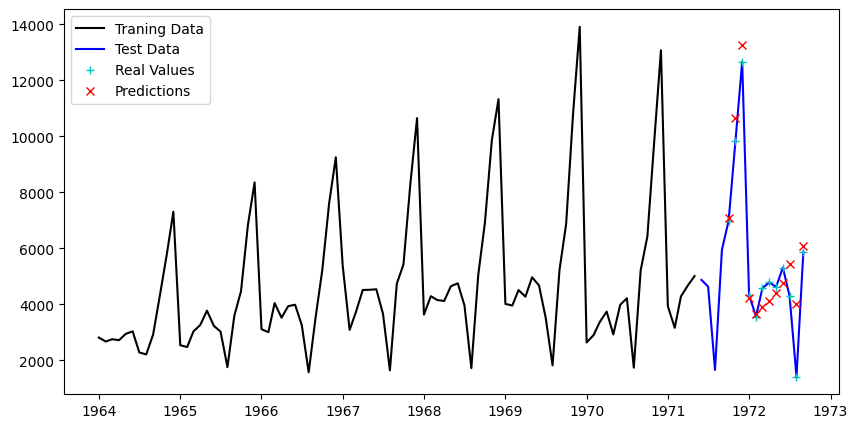


Error-Modelo-FacebookProphet: RMSE: 933.876


In [212]:
import random  # added for python's random module
import os

# Set the random seeds
random_seed = 42  # You can choose any integer value
np.random.seed(random_seed)
tf.random.set_seed(random_seed)
random.seed(random_seed)  # seed python's random if needed
#os.environ['PYTHONHASHSEED'] = str(random_seed)

# Construimos un modelo secuencial relativamente simple basado en LSTMs:
def modelo():
  model = Sequential()
  model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(window_size, 1)))
  model.add(LSTM(32, activation='relu'))
  #model.add(LSTM(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)))
  model.add(Dense(1))
  return model

compilation_parameters = {
        "optimizer": 'RMSprop',  # O 'adam' o 'SGD'
        "loss": 'mean_squared_error',
        "metrics": [tf.keras.metrics.RootMeanSquaredError()]
    }

LSTM_rmse = LSTM_model(X_train, y_train, X_test, y_test,
                       model=modelo(), epochs = 85, batch_size = 5,
                       **compilation_parameters,
                       metric="RMSE", printResult=True, printPlot=True)

## **Conclusiones**


In [213]:
results = pd.DataFrame({
    'Modelo': ['Ingenuo', 'ARIMA', "Prophet", "LSTM"],
    'RMSE': [ingenuo_rmse, ARIMA_rmse, prophet_rmse, LSTM_rmse]
})

results

,Modelo,RMSE
0,Ingenuo,3260.144224
1,ARIMA,367.388697
2,Prophet,418.878554
3,LSTM,933.875828


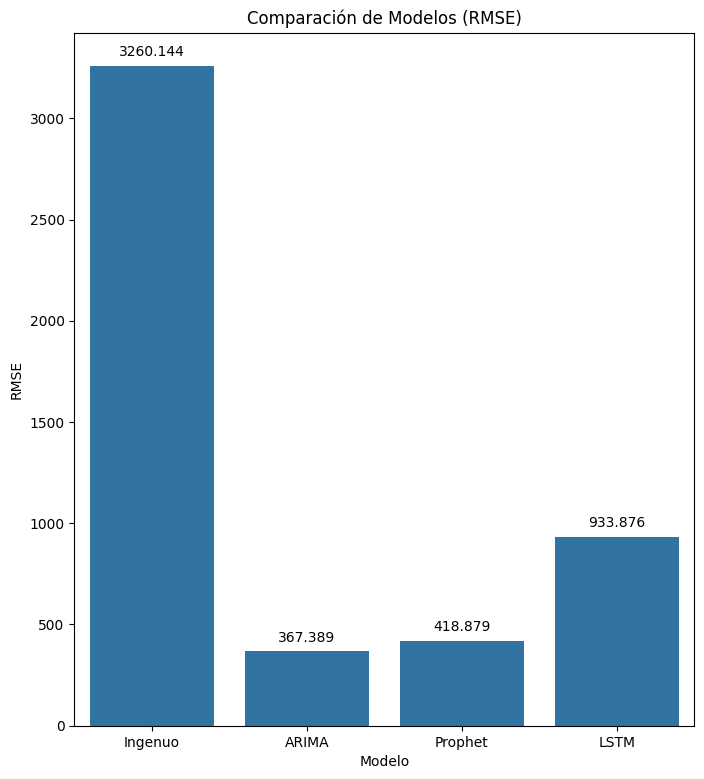

In [214]:
# Graficando resultados
plt.figure(figsize=(8,9))
ax = sns.barplot(x='Modelo', y='RMSE', data=results, orient='v') # Asigna el gráfico a la variable 'ax'
plt.title('Comparación de Modelos (RMSE)')

# Agrega etiquetas de datos
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.3f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

Conforme a los resultados anteriores podmeos observar que el mejor modelo que se pudo lograr fue ARIMA, seguido de Prophet, LSTM y por último el Ingenuo.

Comparando con el modelo ingenuo se ocncluye que los resultados bastante buenos, sobre todo con los modelos ARIMA y Prophet.

Considero que si se mejoran los hiperparámetros y se realiza un escalamiento de los datos, se podrá obtener un resultado aún mejor, sobre todo con el modelo LSTM.  

## **<<< Fin de la Actividad de la Semana - Pronósticos y Series de Tiempo >>>**